# Actividad


---
Por: Ángela Córdoba


---




**Dataset:** https://www.kaggle.com/datasets/arushchillar/disneyland-reviews

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import keras
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
# Importar conjunto de datos
# code by Gemini
df = pd.read_csv("DisneylandReviews.csv", delimiter=',', quotechar='"', on_bad_lines='skip', encoding='latin-1')
print(df.head())

   Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong  


In [3]:
# Descripción del dataset
print(df.describe())

          Review_ID        Rating
count  4.265600e+04  42656.000000
mean   3.188553e+08      4.217695
std    1.657092e+08      1.063371
min    1.398724e+06      1.000000
25%    1.743274e+08      4.000000
50%    2.907583e+08      5.000000
75%    4.489579e+08      5.000000
max    6.708014e+08      5.000000


In [4]:
# Recuento de valores únicos en la columna 'sentimiento'
# Permite ver cuántas revisiones están etiquetadas como positivas o negativas
print("Total :\n", df['Rating'].value_counts())

Total :
 Rating
5    23146
4    10775
3     5109
2     2127
1     1499
Name: count, dtype: int64


Preprocesamiento de las secuencias

In [5]:
# Inicialización de listas
review = []

# Bucle de iteración para almacenar revisiones
sentences = list(df['Review_Text'])
for sen in sentences:
  review.append(sen)

In [6]:
# Creación de etiquetas
import numpy as np

labels = df['Rating']
labels = np.array(list(map(lambda x: 1 if x=="positivo" else 0, labels)))

In [7]:
# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [8]:
# Parámetros
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = "post"
oov_tok = "<OOV>"

In [9]:
# Tokenización y acolchado de secuencias
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(train_sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

In [10]:
# Construcción del modelo
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(16),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo (arquitectura de la red neuronal, número de parámetros, flujo de datos)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 182s 170ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 8.3800e-05
Epoch 2/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 191s 160ms/step - accuracy: 1.0000 - loss: 5.9035e-05 - val_accuracy: 1.0000 - val_loss: 2.0981e-05
Epoch 3/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 171s 160ms/step - accuracy: 1.0000 - loss: 1.6752e-05 - val_accuracy: 1.0000 - val_loss: 8.3167e-06
Epoch 4/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 212s 170ms/step - accuracy: 1.0000 - loss: 6.8110e-06 - val_accuracy: 1.0000 - val_loss: 3.8147e-06
Epoch 5/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 201s 170ms/step - accuracy: 1.0000 - loss: 3.2266e-06 - val_accuracy: 1.0000 - val_loss: 1.7881e-06
Epoch 6/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 194s 162ms/step - accuracy: 1.0000 - loss: 1.5874e-06 - val_accuracy: 1.0000 - val_loss: 1.0729e-06
Epoch 7/30
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 171s 160ms/step - accuracy: 1.0000 - loss: 8.6656e-07 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 8/30

<Axes: >

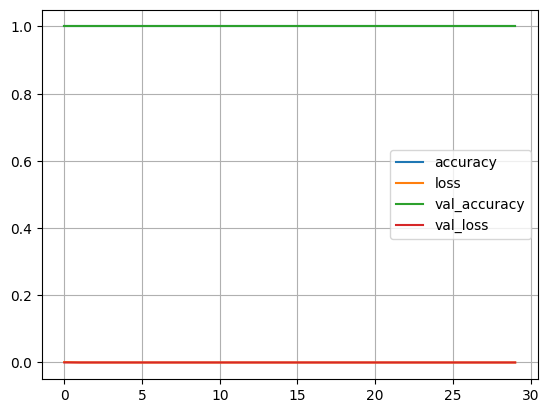

In [13]:
# Entrenamiento del modelo
num_epochs = 30
history = model.fit(padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 0.0
Matriz de confusión: [[8532]]


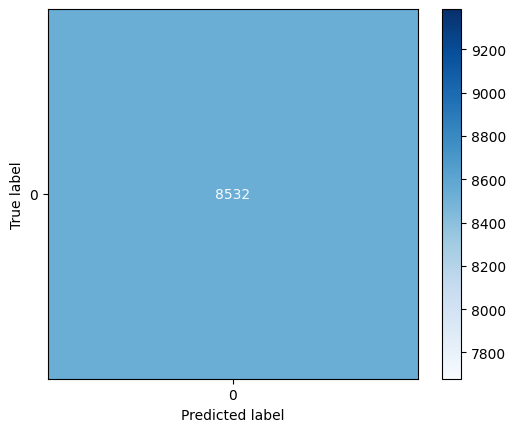

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(testing_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Calcular métricas de evaluación
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
print('Matriz de confusión:', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


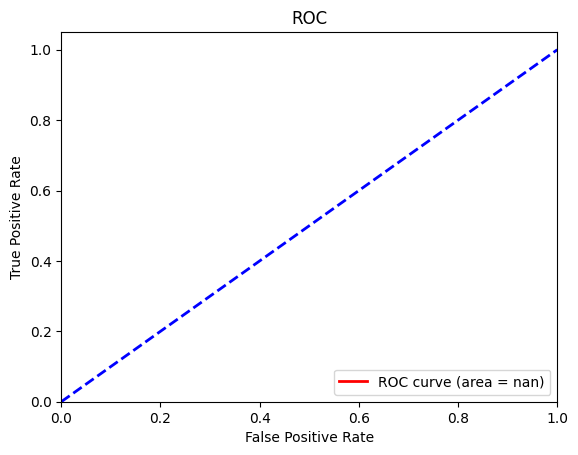

AUC: nan


In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidades de las predicciones
y_prob = model.predict(testing_padded).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step


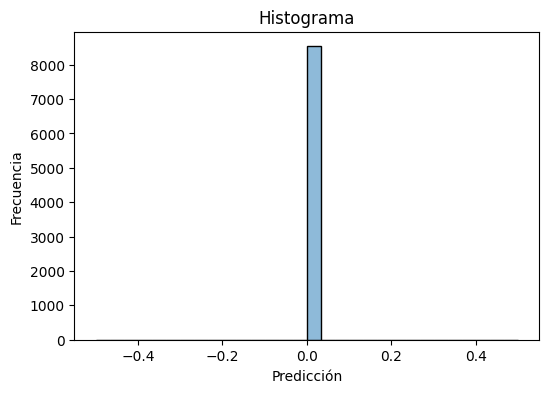

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = (model.predict(testing_padded) > 0.5).astype("int32")

# Diferencia entre las etiquetas verdaderas y las predicciones
errors = np.array(test_labels) - np.array(y_pred).flatten()

# Histograma
plt.figure(figsize=(6, 4))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

In [ ]:
rlocs_viz = df.groupby('Reviewer_Location', as_index=False).agg({'Rating':'mean'}).sort_values('Rating', ascending=False)

In [ ]:
import plotly.express as px
# Esquema para ver el porcentaje de opiniones en diferentes países
figura = px.choropleth(rlocs_viz,
                    locations = 'Reviewer_Location',
                    locationmode = 'country names',
                    color = 'Rating',
                    hover_data = ['Rating'],
                    title = 'Esquema')
figura.show()